In [69]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential # model
from tensorflow.keras.layers import Activation, Dense, LeakyReLU # Type of layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from utils.functions import *
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print("NUM GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

NUM GPUs Available:  1


In [71]:
df = pd.read_csv("assignment-files/wine.csv", index_col="index")
print(df.columns)
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'colour', 'target'],
      dtype='object')
(6497, 14)
(5320, 14)


In [72]:
y = df["target"].values
X = df.drop(["quality","target"], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, stratify=y, shuffle=True)

In [73]:
smote = SMOTE(random_state=42, k_neighbors=2)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

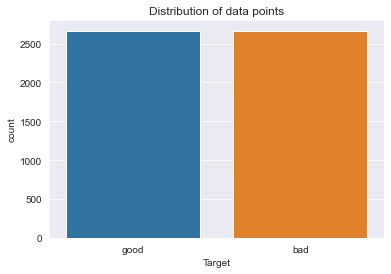

In [74]:
plot_lst = []
for x in y_train_smote:
    x = binary_to_text(x)
    plot_lst.append(x)

sns.set_style("darkgrid")
sns.countplot(x=plot_lst)
plt.xlabel("Target")
plt.title("Distribution of data points")
plt.savefig("visuals/even_data.png", bbox_inches="tight")
plt.show()

In [75]:
scaler = StandardScaler().fit(X_train)
X_train_smote = scaler.transform(X_train_smote)
X_test = scaler.transform(X_test)

In [ ]:
layer = Dense(units=20, activation="relu")
model = Sequential([
    Dense(units=10, activation="relu", input_shape=(12,)),
    layer,
    Dense(units=40, activation="relu"),
    Dense(units=2, activation="softmax")
])
# 20 40 10 2

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('best_model_balanced.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
learning_rate = 0.0005
loss = "sparse_categorical_crossentropy"
metrics = "accuracy"
model.compile(optimizer=Adam(learning_rate=learning_rate),
                             loss=loss, metrics=metrics)

In [ ]:
history = model.fit(x=X_train_smote, y=y_train_smote, batch_size=5,
                    epochs=500, verbose=0, validation_split=0.4,
                    callbacks=[es, mc])

In [ ]:
# model.save("models/categorical_.h5")

In [59]:
best_val_model = load_model("best_model_balanced.h5")

In [60]:
predictions = best_val_model.predict(x=X_test, batch_size=100)
rounded_predictions = np.argmax(predictions, axis=-1)
cm = confusion_matrix(y_test,rounded_predictions)
plot_labels = ["bad","good"]

test loss, test acc: [0.49256953597068787, 0.7706766724586487]
(1064,)


<Figure size 1008x1008 with 0 Axes>

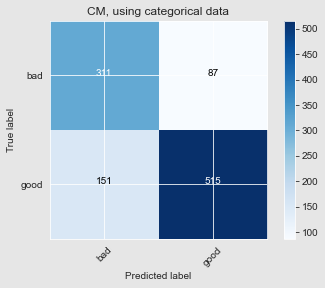

In [76]:
results = best_val_model.evaluate(X_test, y_test, batch_size=500, verbose=0)
print("test loss, test acc:", results)
print(y_test.shape)
plot_confusion_matrix(cm=cm, classes=plot_labels,
                      title= "CM, using categorical data",
                      savefig_location="visuals/cm_best_balanced")

In [77]:
plot_and_print_loss(history)

NameError: name 'history' is not defined